# titanic survival case

In [1]:
#import libraries and dataset
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load dataset
train=pd.read_csv("train.csv",index_col=[0])
test=pd.read_csv("test.csv",index_col=[0])

# data exploration

In [3]:
#number of observation,columns and datatypes in train dataset
train.shape,train.dtypes

((891, 11),
 Survived      int64
 Pclass        int64
 Name         object
 Sex          object
 Age         float64
 SibSp         int64
 Parch         int64
 Ticket       object
 Fare        float64
 Cabin        object
 Embarked     object
 dtype: object)

In [4]:
#number of observation,columns and datatypes in test dataset
test.shape,test.dtypes

((418, 10),
 Pclass        int64
 Name         object
 Sex          object
 Age         float64
 SibSp         int64
 Parch         int64
 Ticket       object
 Fare        float64
 Cabin        object
 Embarked     object
 dtype: object)

In [5]:
#summary of train dataset
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# Exploratory Data Analysis

# missing value analysis

In [8]:
#check for any missing value in train dataset
missing_train= pd.DataFrame(train.isnull().sum())
#reset indexing
missing_train= missing_train.reset_index()
#rename variables
missing_train= missing_train.rename(columns={'index':'variables',0:'missing_percent'})
#convert in missing percentage
missing_train['missing_percent']= (missing_train['missing_percent']/len(train))*100
#reorder according to percent value
missing_train = missing_train.sort_values('missing_percent',ascending= False)
print(missing_train)

   variables  missing_percent
9      Cabin        77.104377
4        Age        19.865320
10  Embarked         0.224467
0   Survived         0.000000
1     Pclass         0.000000
2       Name         0.000000
3        Sex         0.000000
5      SibSp         0.000000
6      Parch         0.000000
7     Ticket         0.000000
8       Fare         0.000000


we can see that three columns has missing values cabin,age and embarked
out of these three columns cabin column has huge missing value more than 70%,
so we remove cabin column from our dataset.
next we have two columns to impute missing value i.e age and embarked column.

In [9]:
#droping cabin column from train dataset
train=train.drop(['Cabin'] ,axis=1)
train['Age'].fillna(train.Age.mean(),inplace=True)
train.dropna(axis=0,inplace=True)

In [14]:
#check missing value in test dataset
missing_test=pd.DataFrame(test.isnull().sum())
#reset indexing
missing_test= missing_test.reset_index()
#rename variables
missing_test = missing_test.rename(columns={'index':'variables',0:'missing_percent_test'})
#convert to percentage
missing_test['missing_percent_test']=(missing_test['missing_percent_test']/len(test))*100
#reorder according to percentage
missing_test=missing_test.sort_values('missing_percent_test', ascending=False)
#print missing values
print(missing_test)

  variables  missing_percent_test
0    Pclass                   0.0
1      Name                   0.0
2       Sex                   0.0
3       Age                   0.0
4     SibSp                   0.0
5     Parch                   0.0
6    Ticket                   0.0
7      Fare                   0.0
8  Embarked                   0.0


In [11]:
#droping cabin column from test dataset
test=test.drop(['Cabin'] ,axis=1)

#fill na with mean value in Age column
test['Age'].fillna(test.Age.mean(),inplace=True)


In [13]:
test["Fare"].fillna(test.Fare.mean(),inplace=True)

## Feature Selection

In [15]:
# first of all see the target variable
train.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

<AxesSubplot:>

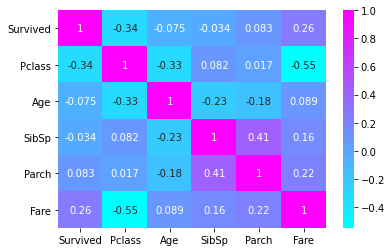

In [16]:
# heatmap to show correlation for various attributes
train_corr = train.corr()
sns.heatmap(train_corr,cmap="cool",annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

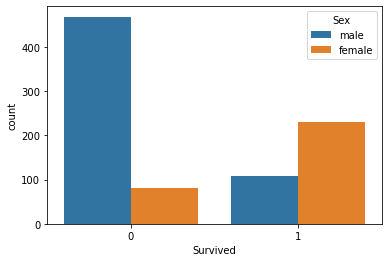

In [17]:
# see the impact of Sex on survival
sns.countplot(train.Survived,hue=train["Sex"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

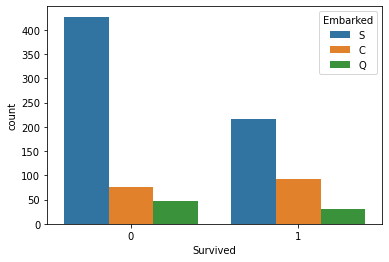

In [18]:
sns.countplot(train.Survived,hue=train['Embarked'])

In [19]:
train.drop(columns={"Name","Age","SibSp","Parch","Ticket"},inplace=True)

### one hot encoding

In [20]:
train=pd.get_dummies(train,drop_first=True)

## model building

In [21]:
#import Logistic regression
from sklearn.linear_model import LogisticRegression

# import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#import random forest
from sklearn.ensemble import RandomForestClassifier

#import naive bayes
from sklearn.naive_bayes import GaussianNB

# import support vector machine
from sklearn.svm import SVC

# import train_test_split
from sklearn.model_selection import train_test_split

### train and test split

In [22]:
# import classification  report
from sklearn.metrics import classification_report

# import confusion matrix
from sklearn.metrics import confusion_matrix

# import accuracy score
from sklearn.metrics import accuracy_score

In [23]:
X=train.iloc[:,1:6]
Y=train.Survived
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

In [24]:
# create, fit, train and  predict with logistic regression
# logistic regression
lg=LogisticRegression().fit(X_train,Y_train)
y_pred_lg = lg.predict(X_test)

# print accuracy score
print(accuracy_score(y_pred_lg,Y_test))

# print classification report
print(classification_report(y_pred_lg, Y_test))


0.7443946188340808
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       129
           1       0.70      0.68      0.69        94

    accuracy                           0.74       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.74      0.74      0.74       223



### Decision Tree

In [25]:
# create and fit model
dt=DecisionTreeClassifier().fit(X_train,Y_train)

#predictions
y_pred_dt = dt.predict(X_test)

#print accuracy score
print(accuracy_score(y_pred_dt,Y_test))

# classification report
print(classification_report(y_pred_dt,Y_test))

0.7937219730941704
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       144
           1       0.68      0.78      0.73        79

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.80       223



### Random Forest

In [26]:
#create and fit rf model
rf=RandomForestClassifier(n_estimators=200).fit(X_train,Y_train)

# predictions
y_pred_rf = rf.predict(X_test)

# print accuracy score
print(accuracy_score(y_pred_rf,Y_test))

# print classification Matrix
print(classification_report(y_pred_rf,Y_test))

0.7847533632286996
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       132
           1       0.74      0.74      0.74        91

    accuracy                           0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.78      0.78      0.78       223



### support vector machine

In [27]:
# create and fit model
svm = SVC().fit(X_train,Y_train)

# predictions
y_pred_svm = svm.predict(X_test)

# print accuracy score
print(accuracy_score(y_pred_svm,Y_test))

# print classification report
print(classification_report(y_pred_svm,Y_test))

0.6233183856502242
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       186
           1       0.24      0.59      0.34        37

    accuracy                           0.62       223
   macro avg       0.56      0.61      0.54       223
weighted avg       0.78      0.62      0.67       223



### Naive Bayes

In [28]:
# create and fit model
gb=GaussianNB().fit(X_train,Y_train)

# predictions
y_pred_gb=gb.predict(X_test)

# print accuracy score
print(accuracy_score(y_pred_gb,Y_test))

# print classification report
print(classification_report(y_pred_gb,Y_test))

0.7623318385650224
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       153
           1       0.59      0.77      0.67        70

    accuracy                           0.76       223
   macro avg       0.74      0.76      0.74       223
weighted avg       0.79      0.76      0.77       223



In [29]:
# it seems  that Rf model is best suited for our predictions based on precision, recall and accuracy score.

### preprocessing for test data

In [30]:
# check missing value
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [31]:
pd.set_option("display.max_rows",None)

In [33]:
# make a copy of test dataset
test_new = test.copy()
test_new

(418, 9)

In [34]:
# feature selection for test data before prediction

test_new.drop(columns={"Name","Age","SibSp","Parch","Ticket"},inplace=True)
test_new=pd.get_dummies(test_new,drop_first=True)


In [35]:
# predictions using rf
test_y = rf.predict(test_new)

In [36]:
test_y

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [37]:
test["Survive"]=test_y

In [38]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survive
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.829200,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.000000,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.687500,Q,0
895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.662500,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.287500,S,1
897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.225000,S,0
898,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.629200,Q,0
899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.000000,S,0
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.229200,C,1


In [39]:
test.to_csv("titanic_survivers.csv")